## Loading the data 

In [1]:
from MIAS import MIAS
from Images import *

In [2]:
## importing modules
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import IPython.display as display
from matplotlib import pyplot as plt
import cv2

import skimage.measure
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

import numpy as np
import cv2
import os
import imghdr

import cv2, matplotlib.image
from skimage import img_as_ubyte
from PIL import Image

import random

import numpy as np
import hashlib
from PIL import Image

import numpy as np
from scipy.ndimage import map_coordinates

import numpy as np
from scipy.ndimage import map_coordinates
from math import cos,sin, pi
#import supervisely_lib as sly
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
miaspics = r'.\data\MIAS\all-mias'
miaslabels =   r'.\data\MIAS\Info.txt'

In [4]:
mias = MIAS(miaspics,miaslabels)

In [5]:
print(mias)

There are 322 images, of which 207 are normal 64 are benign and 51 are malignant


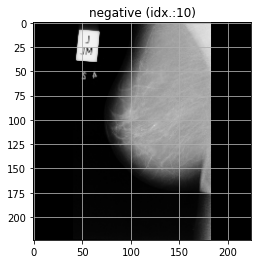

In [7]:
mias.plot_image(10)

## Plot unique images

101.9375 124.03125 11.375
90.78125 100.625 8.3125


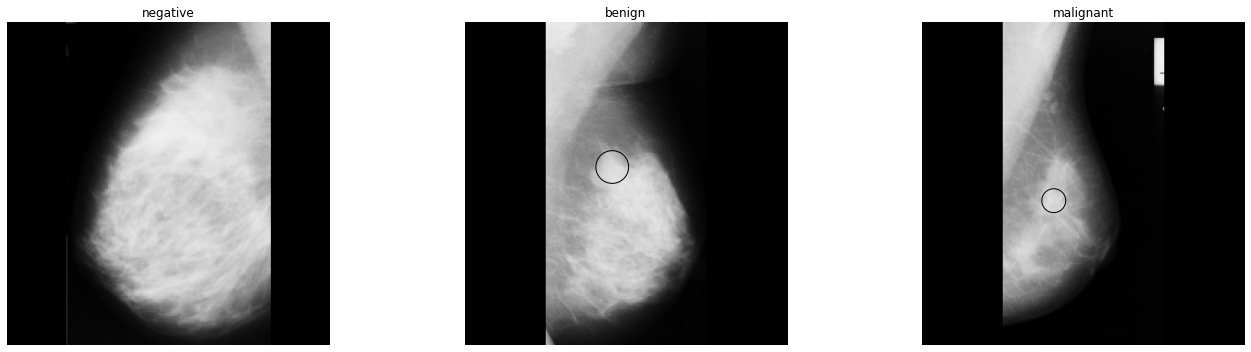

In [6]:
mias.plot_unique()

51
103
78.09375 79.84375 10.9375
244


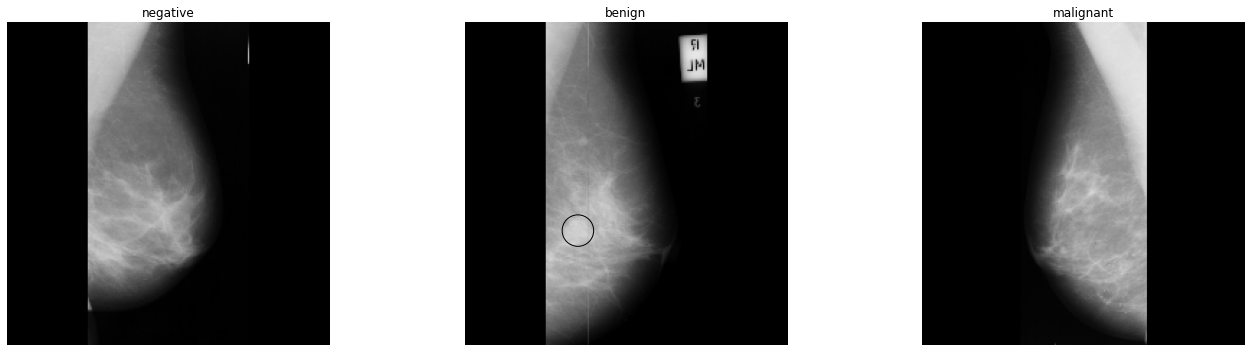

In [55]:
def plot_unique():
    # find unique classes
    classes = np.unique(mias.labels)
    # create dict with empty lists for each class
    class_dict = {}

    for c in classes:
        class_dict[c] = []
    # loop through labels and append corresponding images to class_dict
    for i in range(len(mias.labels)):
        label = mias.labels[i]
        image = mias.images[i]
        class_dict[label].append([image,i])
   # print(class_dict, class_dict[0])

    fig, ax = plt.subplots(1, len(classes), figsize=(20,5))
# select one random image for each class and plot it 
    for i, c in enumerate(classes):
        images_list = class_dict[c]
        random_image = random.choice(images_list)
        img, idx = random_image
        print(idx)
        ax[i].imshow(img)
        ax[i].set_title(f"{mias.get_label(c)}", fontsize = 12)
        ax[i].axis("off")  
        if mias.coordinates[idx][0][0].astype(str)!= "nan":
            try: 
                #x,y,r = map(lambda x: x *(self.pixels/1024), self.coordinates[idx][0])
                x,y,r = mias.coordinates[idx][0]
                print(x,y,r)
                circle = plt.Circle((x,mias.pixels - y),r,fill = False) # self.pixels-y
                ax[i].add_artist(circle)  # Add circle to the appropriate subplot
            except:
                pass

    plt.tight_layout()
    fig.savefig("METHODS/unique_images_plot")
    plt.show()
plot_unique()

303


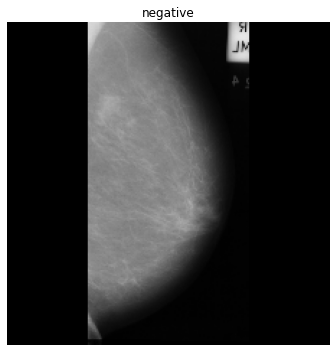

In [59]:
## plotting normal image
idx = 303
img = mias.images[idx]
lab =mias.labels[idx] 
fig, ax = plt.subplots(1, figsize=(5,5))
# select one random image for each class and plot it 
#images_list = class_dict[c]
#random_image = random.choice(images_list)
img, idx = img, idx
print(idx)
ax.imshow(img)
ax.set_title(f"{mias.get_label(lab)}", fontsize = 12)
ax.axis("off")  
if mias.coordinates[idx][0][0].astype(str)!= "nan":
    try: 
        #x,y,r = map(lambda x: x *(self.pixels/1024), self.coordinates[idx][0])
        x,y,r = mias.coordinates[idx][0]
        print(x,y,r)
        circle = plt.Circle((x,mias.pixels - y),r,fill = False) # self.pixels-y
        ax.add_artist(circle)  # Add circle to the appropriate subplot
    except:
        pass

plt.tight_layout()
fig.savefig("METHODS/normal_img")
plt.show()

103
78.09375 79.84375 10.9375


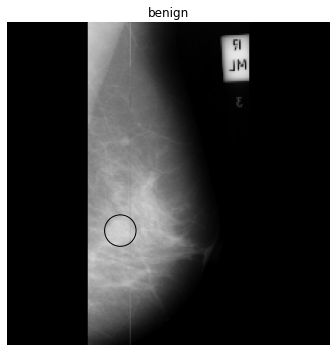

In [57]:
## plotting benign image
idx = 103
img = mias.images[idx]
lab =mias.labels[idx] 
fig, ax = plt.subplots(1, figsize=(5,5))
# select one random image for each class and plot it 
#images_list = class_dict[c]
#random_image = random.choice(images_list)
img, idx = img, idx
print(idx)
ax.imshow(img)
ax.set_title(f"{mias.get_label(lab)}", fontsize = 12)
ax.axis("off")  
if mias.coordinates[idx][0][0].astype(str)!= "nan":
    try: 
        #x,y,r = map(lambda x: x *(self.pixels/1024), self.coordinates[idx][0])
        x,y,r = mias.coordinates[idx][0]
        print(x,y,r)
        circle = plt.Circle((x,mias.pixels - y),r,fill = False) # self.pixels-y
        ax.add_artist(circle)  # Add circle to the appropriate subplot
    except:
        pass

plt.tight_layout()
fig.savefig("METHODS/benign_img")
plt.show()

270
171.5 59.0625 14.875


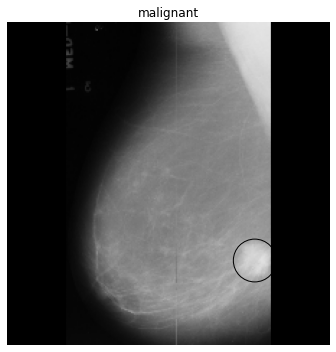

In [58]:
#plotting malignant image
idx = 270
img = mias.images[idx]
lab =mias.labels[idx] 
fig, ax = plt.subplots(1, figsize=(5,5))
# select one random image for each class and plot it 
#images_list = class_dict[c]
#random_image = random.choice(images_list)
img, idx = img, idx
print(idx)
ax.imshow(img)
ax.set_title(f"{mias.get_label(lab)}", fontsize = 12)
ax.axis("off")  
if mias.coordinates[idx][0][0].astype(str)!= "nan":
    try: 
        #x,y,r = map(lambda x: x *(self.pixels/1024), self.coordinates[idx][0])
        x,y,r = mias.coordinates[idx][0]
        print(x,y,r)
        circle = plt.Circle((x,mias.pixels - y),r,fill = False) # self.pixels-y
        ax.add_artist(circle)  # Add circle to the appropriate subplot
    except:
        pass

plt.tight_layout()
fig.savefig("METHODS/malignant_img")
plt.show()

## descriptive Statistics

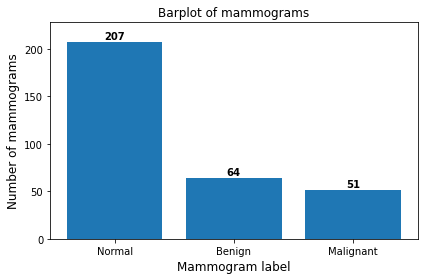

In [6]:
images, labels, coords = mias.images.copy(), mias.labels.copy(), mias.coordinates.copy()
plotfrequencies(labels)

C:\Users\annkr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\annkr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\annkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


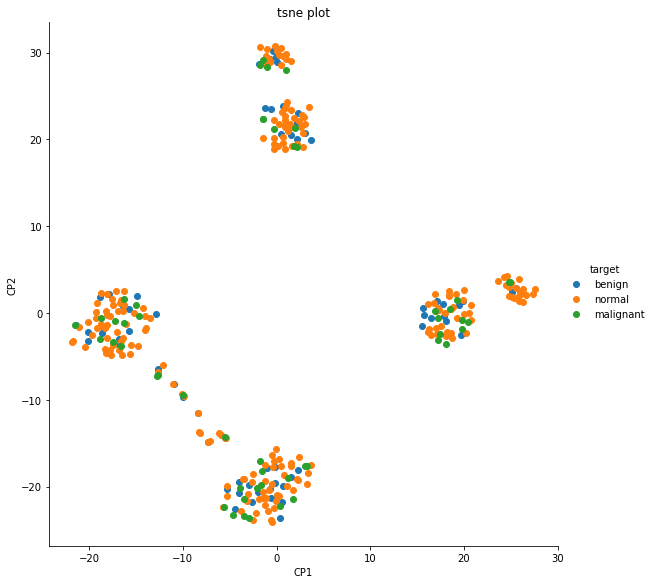

In [7]:
plot_tsne_images(images, labels)

## Preprocessing 

### Noise removal 

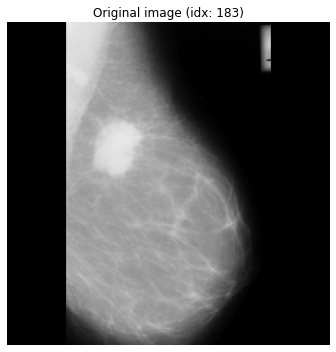

In [18]:
## noise removal 
img, labels, coords = mias.images.copy()[183], mias.labels.copy()[183], mias.coordinates.copy()[183]

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(img)
ax.set_title("Original image (idx: 183)", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/orig_image_183")

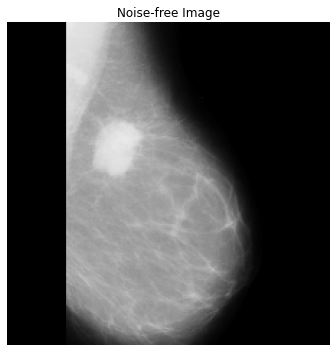

In [20]:
noise_free_image = noise_removal(img)
## noise removal 
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(noise_free_image)
ax.set_title("Noise-free Image", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/noise_free_img")

## Image enhancement

Image Enhancement


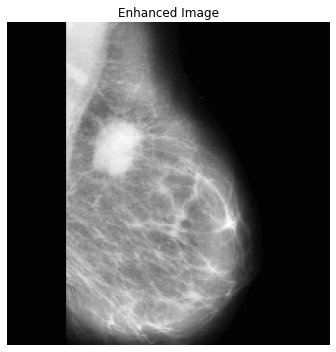

In [21]:
print("Image Enhancement")
enhanced_image = image_enhancement(noise_free_image)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(enhanced_image)
ax.set_title("Enhanced Image", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/enhanced_img")

## Data Augmentation

In [10]:
print(np.unique(labels, return_counts = True)[1])

[1]


## checking distribution after preprocessing

C:\Users\annkr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\annkr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\annkr\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


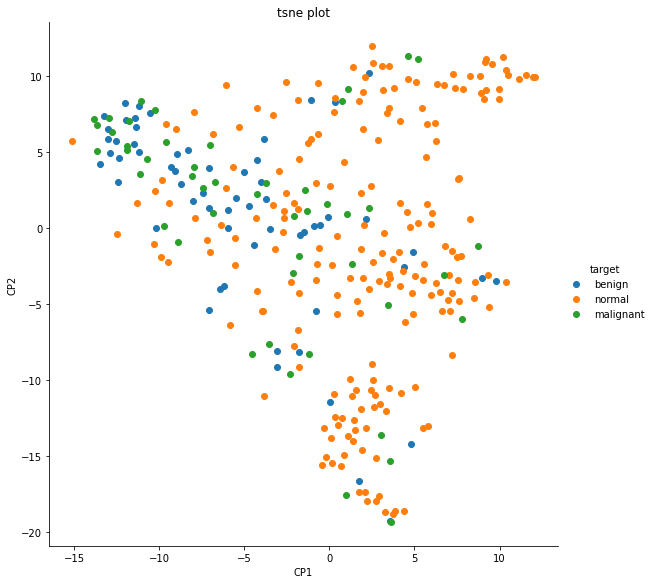

In [16]:
plot_tsne_images(roi_images, roi_labels)

In [34]:
## roi
print(coords)

[(77.0, 136.5, 24.9375)]


### ROI extraction

In [24]:
crop = crop_ROI(enhanced_image, coords[0]) 

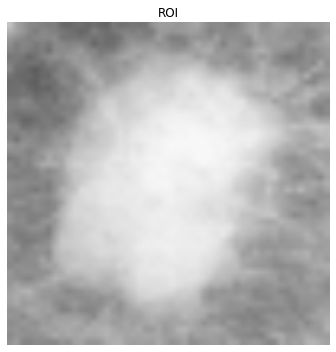

In [25]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(crop)
ax.set_title("ROI", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/roi_img")

### Rotation

In [27]:
print("Rotating Images")
img_rotated, _ = rotate_image(crop,labels, 90)

Rotating Images


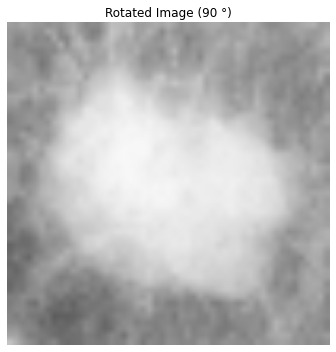

In [28]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(img_rotated)
ax.set_title("Rotated Image (90 °)", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/rotated_img_90")

### Flipping 

#### vertically flipped images

In [29]:
flipped_images_v = flip_vertically(crop)
#flipped_images_v_labels = lab.copy()
#print(f"There are {len(flipped_images_v)} vertically flipped images and labels")

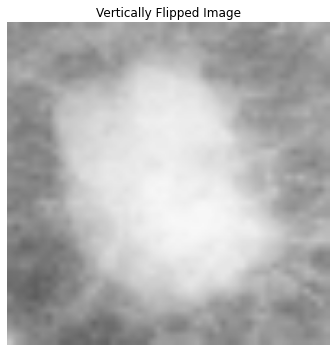

In [30]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(flipped_images_v)
ax.set_title("Vertically Flipped Image", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/vflipped_img")

### brightness change

In [31]:
bright_img = change_brightness_contrast(crop)

10.505078037277116 0.6088493450264947


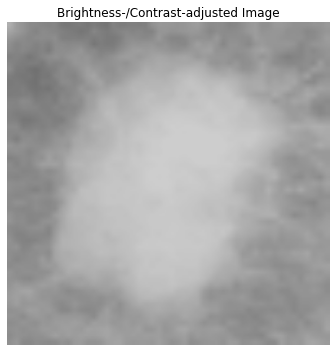

In [33]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(bright_img)
ax.set_title("Brightness-/Contrast-adjusted Image", fontsize = 12)
ax.axis("off")
plt.tight_layout()
fig.savefig("METHODS/bright_img")

## plotting all 

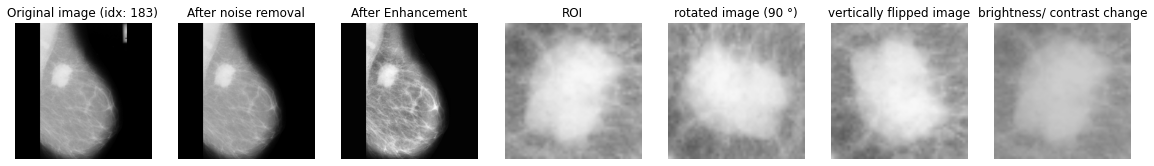

In [34]:

fig, ax = plt.subplots(1,7, figsize=(20,20))
# plot original image
ax[0].imshow(img)
ax[0].set_title("Original image (idx: 183)", fontsize = 12)
ax[0].axis("off")

# plot noise free image
ax[1].imshow(noise_free_image)
ax[1].set_title("After noise removal")
ax[1].axis("off")

# plot enhanced image
ax[2].imshow(enhanced_image)
ax[2].set_title(f"After Enhancement")
ax[2].axis("off")

# plot roi crop
ax[3].imshow(crop) 
ax[3].set_title("ROI")
ax[3].axis("off")

# plot rotated image (90°)
ax[4].imshow(img_rotated) 
ax[4].set_title("rotated image (90 °)")
ax[4].axis("off")

# plot vertically flipped image
ax[5].imshow(flipped_images_v) 
ax[5].set_title("vertically flipped image")
ax[5].axis("off")

# plot mage with brighteness and contrast change
ax[6].imshow(bright_img) 
ax[6].set_title("brightness/ contrast change")
ax[6].axis("off")

fig.savefig("METHODS/preprocessing_all_img")
plt.show()